## **Acoustic Interferometer Data Analysis and Plotting**
#### *Using Argon Gas to Determine an Accurate Acoustic Interferometer Tube Length*

*Jeffery Yarger, jyarger@proton.me*

Jan 15, 2024

This juypter notebook is written in python and designed to be web browser compatible using CoLaboratory ([Google CoLab](https://colab.research.google.com/)) and public [GitHub](https://github.com/) repositories ([CHM343 GitHub Acoustic Interferometry Data Repository](https://github.com/CHM343/Acoustic_Interferometer/tree/main/Data)).



# Introduction

An remotely accessible acoustic interferometer has been designed and setup at ASU as part of [ASU Online](https://asuonline.asu.edu/) Physical Chemistry Labs (ASU Online CHM 343, [BioPchem Public Website](https://biopchem.education/)).  The basic concept is that different gases can be purged through a tube that has a speaker and microphone for measuring acoustic interferometry, allowing the speed of sound of various gases to be determined.  The speed of sound is directly related to thermodynamic properties, i.e., the compressibility (and heat capacity ratio) [1-3].   This notebook assumes that sound data has been collected (currently using [Audacity](https://www.audacityteam.org/)) and the recorded sound has been Fourier Transformed (FT), resulting in a frequency spectrum (and these spectra saved in a text format).

This notebook specifically shows an example of using Argon Gas to determine an accurate tube length of the acoustic interferometer.  This is associated with a CHM 343 Lab 1 quiz and exercise in Spring 2024.

[1] [BioPchem.Education blog post](https://biopchem.education/2022/01/17/acoustic-interferometry-pchem-cloud-lab/).

[2] [Heat Capacity and the Speed of Sound, Blog Post (2020)](https://biopchem.education/2022/01/17/acoustic-interferometry-pchem-cloud-lab/).

[3] “Determining the Speed of Sound and Heat Capacity Ratios of Gases by Acoustic Interferometry” - J. Chem. Educ. 2017, 94, 12, 1995–1998. (https://doi.org/10.1021/acs.jchemed.7b00526)

# Import Python Libraries

First import the python libraries needed for reading in data, plotting the data and performing any necessary data analysis.

In [1]:
#Basic Jupyter / IPython Display Library
from IPython import display

#Data Analysis and Visualization (Libraries)
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.signal import find_peaks
from scipy import stats
from scipy.stats import t

# Acoustic Interferometry

The acoustic interferometer is a DIY setup where a 1 inch diameter tube with a length of around 2 ft is capped on each end with a speaker, microphone and gas inlet and outlets. Audio data was collected using audacity (where audacity allows playing sound to the speaker and recording from the microphone). The most common way to record acoustic interference is to generate and play white noise using the speaker and record the resulting sound at the microphone.  The resulting sound data is Fourier Transformed (FT) to a frequency spectrum, where the resonant nodes can be easily observed (in audacity this can be done by going to Analyze > Plot Spectrum). Spectral Data was saved as a text file and uploaded to a public GitHub repository.  Its this GitHub data that will be read, analyzed and plotted in this Juypter Notebook (CoLab Notebook).

Before using this notebook, upload data to CHM343 (asuchm343@gmail.com) public GitHub repository (https://github.com/CHM343/Acoustic_Interferometer/tree/main/Data).  Now you can read the data files directly from GitHub to any Juypter or Python notebook using pandas.  Hint, make sure to read the raw data file. The exported spectral text files created by audacity are basic frequency (Hz) vs Level (dB) with a tab deliminator.  The first line is the data column labels and all subsequent lines are the x-y data (2 columns, Frequency and Level).

## Instrument and Experimental Details

A remote acoustic interferometer was setup at ASU (Physical Sciences D-wing Rm 332, PSD332).  The current setup (for Jan 2024, 2024_01_xx) uses a 2 foot long 1 inch diameter PC tube with square end caps that have drilled holes for the earbud (speaker), lav mic (microphone), needle gas inlet (on earbud side), and small hole for gas exit (microphone side).  The microphone is on one side and the speaker (earbud) on the other side.  A microcontroller is setup with solenoid valves to allow computer control of 4 different input gases.  A flow meter is included after the solenoid manifold and a PZT camera is available for a live view of the instrument and flow meter to monitor the gas flow into the tube.  Audacity was used to generate sound that was played through the speaker as well as record the resulting sound generated through the gas filled tube through a microphone.  Specifically, Argon gas was purged for 60 sec prior to running and was flowing at 2 liters per minute (LPM) for 60 sec during the sound data collection.  Sound data was recorded for 30+ seconds so that the gas flow stopping can be observed and background sound data with no gas flow or sound is recorded to so that one can evaluate any ambient lab sound.  Argon gas has a well known sound velocity, and therefore can be used to accurately determine the acoustic interferometer tube length.

<img src="https://github.com/CHM343/Acoustic_Interferometer/blob/main/ScreenShot/2024_01_08_Acoustic_Interferometer.jpeg?raw=true" alt="Acoustic Interferometer Image" />



## Read in Audio Data and Spectral Data from Public GitHub Repository

In [2]:
# Read in audacity exported spectral data (and first line header label) from public CHM343 GitHub Repository using pandas.
# Argon Gas Spectrum
Gas1_Spectrum = pd.read_table('https://raw.githubusercontent.com/CHM343/Acoustic_Interferometer/main/Data/2024_01_10_AI_Gases_PSD332_Argon_Spectrum.txt', sep = "\t" ,header=0)
Gas11_Spectrum = pd.read_table('https://raw.githubusercontent.com/CHM343/Acoustic_Interferometer/main/Data/2024_01_12_AI_Video_Test_Argon_Spectrum.txt', sep = "\t" ,header=0)

## Plot of Spectral Data (for White Noise sound)

The common method for converting the sound data into a spectral frequency data is using a Fourier Transform.  The resonance frequencies can be determined from the peak of each spectral resonance node. Acoustic interferometry data is collected for several gases.  Make a stacked plot of all the spectral data.  This provides a quick visual means of looking at all the spectral data together and is starting point for a lab report or exercise figure.  This plot uses the python [MatPlotLib](https://matplotlib.org/) library.

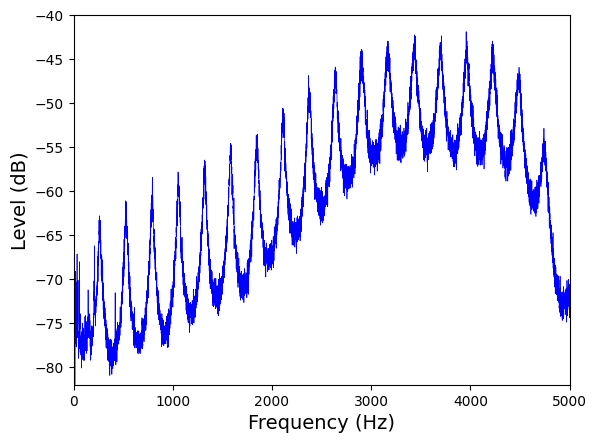

In [3]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '11'

# Plot Gas Spectral Data Sets
ax.plot(Gas1_Spectrum['Frequency (Hz)'], Gas1_Spectrum['Level (dB)'], linewidth=0.5, color = 'blue', label = 'Gas 1')
#ax.plot(Gas11_Spectrum['Frequency (Hz)'], Gas11_Spectrum['Level (dB)'], linewidth=0.5, color = 'red', label = 'Gas 11')

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 5000)
plt.ylim(-82, -40)
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Level (dB)", fontsize=14)

# Display the Plot
plt.show()

**Figure 1** - Argon gas acoustic interferometry spectrum.

## Use the Python SciPy Library to Find Peaks in the Spectral Data

The python [scipy](https://docs.scipy.org/doc/scipy/index.html) library has a [signals](https://docs.scipy.org/doc/scipy/reference/signal.html) component with a [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function that makes determining the resonance frequencies more automated and convenient.

In [4]:
# python code using SciPy library for extracting resonance 'peak' locations in acoustic interferometry white noise spectral data
gas1_peaks = find_peaks(Gas1_Spectrum['Level (dB)'], rel_height=150, width= 200, distance = 200, prominence = 10)
gas11_peaks = find_peaks(Gas11_Spectrum['Level (dB)'], rel_height=150, width= 200, distance = 200, prominence = 10)

# Define the frequency in Hz from each of the gas spectra
Gas1_Frequency = Gas1_Spectrum['Frequency (Hz)']
Gas11_Frequency = Gas11_Spectrum['Frequency (Hz)']

# Make a list of the peaks determined from the SciPy find_peak function
gas1_peak_list = Gas1_Frequency[gas1_peaks[0]]
gas11_peak_list = Gas11_Frequency[gas11_peaks[0]]

# NumPy array and rounding of gas peak list determined from SciPy find_peak function
gas1_peak_array = np.array((round(gas1_peak_list,2)))
gas11_peak_array = np.array((round(gas11_peak_list,2)))

# Pandas DataFrame for the frequencys of each peak determined from SciPy find_peak
gas1_peaktable = pd.DataFrame(gas1_peak_array, columns=["Frequency (Hz)"])
gas11_peaktable = pd.DataFrame(gas11_peak_array, columns=["Frequency (Hz)"])

# Numpy array to define Nodes 1 thru n (the number of peaks determined from SciPy find_peak)
gas1_peaktable['Node'] = np.arange(1, gas1_peaktable.shape[0] + 1)
gas11_peaktable['Node'] = np.arange(1, gas11_peaktable.shape[0] + 1)

# All peaks picked by SciPy put in a pandas dataframe table using .loc to select Node and Frequency labeled data.
gas1_peaktable = gas1_peaktable.loc[:,['Node','Frequency (Hz)']]
gas11_peaktable = gas11_peaktable.loc[:,['Node','Frequency (Hz)']]

# First 15 peaks for each gas dataset (the last data point from SciPy find_peak is often scewed.  Officially, we should probably do a T-test before ommitting this data)
gas1_peaktable_15 = gas1_peaktable.head(15)
gas11_peaktable_15 = gas11_peaktable.head(15)

#Uncomment the following lines if you want to list/print the data
#print('Peak location Frequency (Hz)')
#print('')
#print(round(gas1_peak_list,4))
#print('')
#print('Peak location Frequency (Hz)')
#print('')
#print(round(gas11_peak_list,4))

### Plot the Combine Spectral Data and Scipy find_peaks positions

Its easier to visualize the results of the resonance peak finding by plotting the spectral data and vertical dotted lines for each of the 'peaks' determined from the find_peak scipy function.  The plotting uses MatPlotLib again.

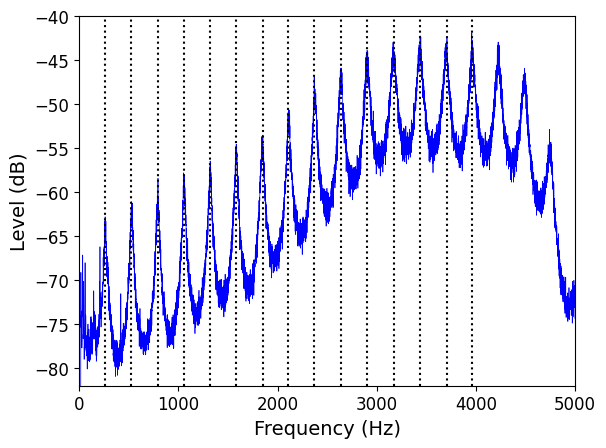

In [8]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '11'

# Plot Gas Spectral Data Sets
ax.plot(Gas1_Spectrum['Frequency (Hz)'], Gas1_Spectrum['Level (dB)'], linewidth=0.5, color = 'blue', label = 'Gas 1')

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 5000)
plt.ylim(-82, -40)
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Level (dB)", fontsize=14)

#For Loop to add the peak_list determined using SciPy find_peaks and add as verticle dotted lines to the spectrum plot
for y in range(15):
  ax.axvline(x = gas1_peak_list.iloc[y], color='k',linestyle='dotted')
  #for y in range(len(gas1_peaks[0])):
#  ax.axvline(x = gas1_peak_list.iloc[y], color='k',linestyle='dotted')

# Display the Plot
plt.show()

**Figure 2** - Argon gas acoustic interferometry spectrum with vertical dotted lines indicating the resonance positions determine using the find_peak function in SciPy.

# Data Analysis of Gas Acoustic Interferometry

The resonance frequencies ($ν$) are related to the the node number ($n = 1, 2, 3, …$) by the speed of sound ($c$) and the length of the acoustic interferometer tube ($L$):
<br><br>
$\nu = \left( \frac{c}{2L} \right) n$
<br><br>
Therefore, a linear fit of resonance frequencies ($ν$) and node number ($n$) gives a slope of $\left( \frac{c}{2L} \right)$ and a y-intercept of zero.  Hence, if you accurately know the speed of sound for the gas, you can determine the length of the acoustic interferometer resonance tube ($L$).  This length is constant and does not change.  So, using a gas with a well known speed of sound allows the length of the tube to be accurately determined.  Once the length of the tube has been determined using one or more gases with a well known speed of sound, we can now use this length to determine the speed of sound of any gases with an unknown speed of sound.  

In the current acoustic interferometer setup (2024_01_10), Argon (Ar) gas is most commonly used to determine an exact tube length because its a noble gas with a well-known sound velocity. Furthermore, we can look at the capped acoustic interferometer tube and roughly measure the tube length with a ruler and we know that if we are doing the data analysis correctly, we should calculate a length that is around 2 ft.  


## Fit and Plot the Combine Gas Resonance Frequency Data
The resonance frequencies determined from the find_peak scipy function is plotted for each gas versus the resonance or node number.  This should be linear and the slope is related to the speed of sound (and the length of the acoustic interferometer tube).  The spectral data is derived from the white noise sound datasets (a similar analysis and plot can be done for the chirp datasets).

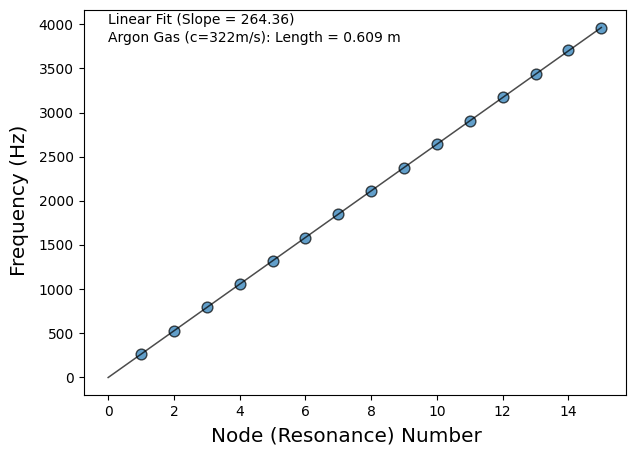

In [6]:
# Initialize plot layout
fig, ax = plt.subplots(figsize = (7, 5))

# Set general font size
plt.rcParams['font.size'] = '12'

# Set X and Y Axis Labels for subPlots
fig.supxlabel('Node (Resonance) Number')
fig.supylabel('Frequency (Hz)')

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)

# Add scatter plots
ax.scatter(gas1_peaktable_15['Node'], gas1_peaktable_15['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")
#ax.scatter(gas11_peaktable_15['Node'], gas11_peaktable_15['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)

b1, a1 = np.polyfit(gas1_peaktable_15['Node'], gas1_peaktable_15['Frequency (Hz)'], deg=1)
#b1, a1 = np.polyfit(gas11_peaktable_15['Node'], gas11_peaktable_15['Frequency (Hz)'], deg=1)

# Speed of Sound for Gases 1 (Argon gas) in m/s at 20C.
c1 = 322

# Determine the Acoustic Interferometer resonance tube length (L) for Gas-1 (Ar) in meters.
l1 = c1/(2*b1)

# Create linear sequence of points for fit line
xseq = np.linspace(0, 15, num=16)

# Plot regression line
ax.plot(xseq, a1 + b1 * xseq, alpha=0.7, color="k", lw=1.1)

#Annotate Plot with text
ax.text(0, 4000, 'Linear Fit (Slope = {})'.format(round(b1,2)), fontsize=10)
ax.text(0, 3800, 'Argon Gas (c=322m/s): Length = {} m'.format(round(l1,4)), fontsize=10)

#Show the plot in this notebook
plt.show()

**Figure 3** - Argon Gas resonance frequencies for the first 15 nodes (blue circles).  A least squared linear fit is shown as a solid black line, and the associated values provided as text in the upper left area of the plot.

## Error Analysis

Last component that needs to be done is to determine the statistical error associated with the data analysis (primarily the linear regression).  This is most commonly seen using the LINEST function in excel or google sheets.  The primary meteric we would like to obtain is the 95 $\%$ confidence in $\Delta L$ and/or $\Delta c$, which can then be used to report the values +/- this delta value.  Using SciPy stat a linear regression and statistical analysis is performed.  The coefficient of determination (R-squared) is determined for each linear regression fit and the 95% confidence interval on slope and intercept is calculated.

In [7]:
# Error Analysis - White Noise, Argon Gas Sound Data (Frequency)

# Linear Regression using SciPy Stat Library
linearregression_gas1 = stats.linregress(gas1_peaktable_15['Node'], gas1_peaktable_15['Frequency (Hz)'])

# Print R-squared values for each of the linear regression fits
print(f"Linear Regression R-squared")
print(f"Gas 1 (Ar) - {linearregression_gas1.rvalue**2:.6f}")
print(f" ")

# Two-sided inverse Students t-distribution, p - probability, df - degrees of freedom
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts1 = tinv(0.05, len(gas1_peaktable['Node'])-2)

# Determine the Acoustic Interferometer resonance tube length (L) for Gas 1 (Ar) in meters and propagation of error to get the associated +/- error value.
l1 = c1/(2*b1)
pe_l1 = math.sqrt(((1/(b1))**2)+(((-c1*(ts1*linearregression_gas1.stderr))/(b1*b1))**2))

# Print values with associated errors
print(f"95% Confidence Level (+/-)")
print(f"__________________________")
print(f"Gas 1 - Argon")
print(f"slope = {linearregression_gas1.slope:.2f} +/- {ts1*linearregression_gas1.stderr:.2f}")
print(f"y-intercept = {linearregression_gas1.intercept:.2f}"
      f" +/- {ts1*linearregression_gas1.intercept_stderr:.2f}")
print(f" ")
print(f"__________________________")
ts1 = tinv(0.05, len(gas1_peaktable['Node'])-2)
print(f"Gas 1 - Argon")
#print(f"Length = {l1:.4f} +/- {pe_l1:.4f}")
print(f"Length = {l1:.4f} +/- ?") #Uncomment the line above to provide the 95% confidence error value in the Acoustic Interferometer tube length.
print(f" ")

Linear Regression R-squared
Gas 1 (Ar) - 0.999989
 
95% Confidence Level (+/-)
__________________________
Gas 1 - Argon
slope = 264.36 +/- 0.53
y-intercept = -2.14 +/- 4.78
 
__________________________
Gas 1 - Argon
Length = 0.6090 +/- ?
 
